In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [6]:
#file = "../code/data/other/combined_scaling.times"
file = "../code/data/other/scaling.times"
df = pd.read_csv(file)

# prepare data
def computeSlowdown(grp):
    grp['slowdown'] = grp['time'] / grp['time'].min()
    return grp
df = df.groupby(['n','iter']).apply(computeSlowdown)
print(df)

           n  iter             alg     time    slowdown
0       1000     0  Dinics0Vanilla      246   18.923077
1       1000     0       Dinics1Bi       28    2.153846
2       1000     0    Dinics2Reset       32    2.461538
3       1000     0    Dinics3Stamp       26    2.000000
4       1000     0     Dinics4Skip       16    1.230769
..       ...   ...             ...      ...         ...
875  1024000     9    Dinics3Stamp    11467    2.310032
876  1024000     9     Dinics4Skip     6001    1.208904
877  1024000     9      Dinics5OPT     4964    1.000000
878  1024000     9     PushRelabel  1084112  218.394843
879  1024000     9    BK-Algorithm   213267   42.962732

[880 rows x 5 columns]


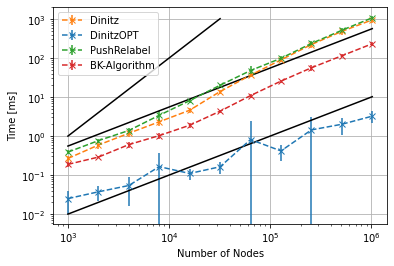

In [11]:
plotAlgs = ['Dinics0Vanilla', 'Dinics5OPT', 'PushRelabel', 'BK-Algorithm']
colors = {'Dinics5OPT': 'C0',
          'Dinics0Vanilla': 'C1',
          'PushRelabel': 'C2',
          'BK-Algorithm': 'C3', 
          'Dinics1Bi': 'C4',
          'Dinics2Reset': 'C5',
          'Dinics3Stamp': 'C6',
          'Dinics4Skip': 'C7',
}

# for this plot we need a name map to hide internal versions
names = {k:k for k in colors.keys()}
names['Dinics0Vanilla'] = 'Dinitz'
names['Dinics5OPT'] = 'DinitzOPT'

fig, ax = plt.subplots(figsize=(6,4))

xs = df.groupby('n').n.first()

# lin low
ys_lin = [x/100000 for x in xs]
ax.plot(xs, ys_lin, '-k')

# squared line
ys_sq = [x*x/1000000 for x in xs[:6]]
ax.plot(xs[:6], ys_sq, '-k')

# linear high
ys_lin = [x/1800 for x in xs]
ax.plot(xs, ys_lin, '-k')

for alg in plotAlgs:
    data = df[df.alg==alg].groupby('n')
    ys = data.time.mean() / 1000
    yerr = data.time.std() / 1000
    ax.errorbar(xs, ys, yerr, fmt='x--', label=names[alg], color=colors[alg])

ax.loglog()
ax.grid()
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time [ms]')
ax.legend(loc='upper left')         
plt.savefig('eval_scaling.pdf', bbox_inches='tight')

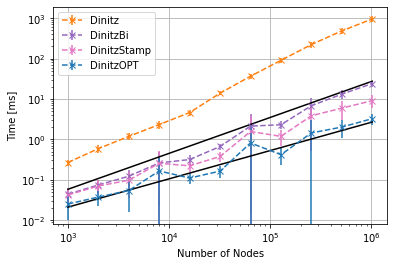

In [9]:
#plotAlgs = ['Dinics0Vanilla', 'Dinics1Bi', 'Dinics2Reset', 'Dinics3Stamp', 'Dinics4Skip', 'Dinics5OPT']
plotAlgs = ['Dinics0Vanilla', 'Dinics1Bi', 'Dinics3Stamp', 'Dinics5OPT']
names = {k:k for k in colors.keys()}
names['Dinics0Vanilla'] = 'Dinitz'
names['Dinics1Bi'] = 'DinitzBi'
names['Dinics3Stamp'] = 'DinitzStamp'
names['Dinics5OPT'] = 'DinitzOPT'

fig, ax = plt.subplots(figsize=(6,4))
xs = df.groupby('n').n.first()

# root
ys_rt = [math.sqrt(x)/1000 for x in xs]
#ax.plot(xs, ys_rt, '-k')

# thomas root
ys_rt = [x**0.8889/8000 for x in xs]
ax.plot(xs, ys_rt, '-k')

# thomas root
ys_rt = [x**0.7/6000 for x in xs]
ax.plot(xs, ys_rt, '-k')

for alg in plotAlgs:
    data = df[df.alg==alg].groupby('n')
    ys = data.time.mean() / 1000
    yerr = data.time.std() / 1000
    ax.errorbar(xs, ys, yerr, fmt='x--', label=names[alg], color=colors[alg])

ax.loglog()
ax.grid()
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time [ms]')
ax.legend()         
plt.savefig('eval_dinscaling.pdf', bbox_inches='tight')